In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

**Salvage cars do not run so they cannot be used. Although, new cars make some sense, it is dropped from this dataset.**

In [5]:
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [6]:
df.drop(df[df.condition.isin(['new','salvage'])].index, inplace=True)
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
Name: count, dtype: int64

In [7]:
df.title_status.value_counts()

title_status
clean         403666
rebuilt         7166
salvage         3593
lien            1394
missing          760
parts only       153
Name: count, dtype: int64

**'Lien' cars have outstanding loans on the car, 'Missing' means they do not have the title. 'Salvage' and 'Parts Only' are cars that do not run. 'Rebuilt' adds an extra element of risk.**

In [8]:
df = df[df.title_status == 'clean']
df.title_status.value_counts()

title_status
clean    403666
Name: count, dtype: int64

In [9]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

**It is good that the posting date are all within one month. This means that the market conditions (inflation, etc.) are all equal for the dataset.**

In [10]:
print(f"Earliest posting_date: {df.posting_date.min()} \nLatest posting_date: {df.posting_date.max()}")

Earliest posting_date: 2021-04-04 07:00:25+00:00 
Latest posting_date: 2021-05-05 04:24:09+00:00


**That's one cheap and expensive car! Something is not right here.**

In [11]:
print(f"Maximum price: {df.price.max()} $\nMinimum price: {df.price.min()} $")

Maximum price: 3736928711 $
Minimum price: 0 $


(array([4.9562e+04, 2.4012e+04, 3.1633e+04, 3.1352e+04, 2.6398e+04,
        2.0065e+04, 1.9643e+04, 2.0292e+04, 1.8593e+04, 1.7775e+04,
        1.2824e+04, 1.3109e+04, 1.4234e+04, 1.3275e+04, 1.3839e+04,
        1.0135e+04, 1.0280e+04, 1.0287e+04, 8.3130e+03, 1.0037e+04,
        3.8530e+03, 3.6290e+03, 3.1600e+03, 2.3580e+03, 2.6230e+03,
        1.1650e+03, 1.5590e+03, 1.4300e+03, 8.6500e+02, 1.4530e+03,
        4.0500e+02, 6.2000e+02, 7.4100e+02, 3.8500e+02, 8.1300e+02,
        2.3400e+02, 3.4400e+02, 2.8600e+02, 2.0300e+02, 3.6900e+02,
        9.4000e+01, 1.6900e+02, 1.7700e+02, 1.0400e+02, 1.1600e+02,
        3.1000e+01, 3.7000e+01, 5.0000e+01, 1.9000e+01, 1.1900e+02]),
 array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.,  20000.,  22000.,  24000.,  26000.,
         28000.,  30000.,  32000.,  34000.,  36000.,  38000.,  40000.,
         42000.,  44000.,  46000.,  48000.,  50000.,  52000.,  54000.,
         56000.,  58000.,  60000.,

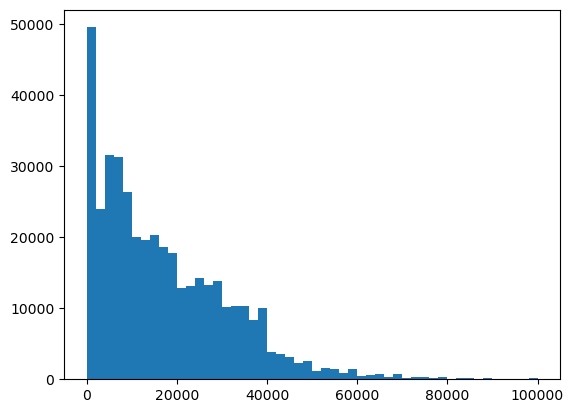

In [12]:
plt.hist(df.price, bins=50, range=[0,100000])

**That many cars should not be within 0 and 2000 dollars (each bin is 2000). I set the minimum allowed price at 500 for this data. Anything set to 0 is likely a fake price set to entice buyers**

In [13]:
df.drop(df[df.price < 500].index, inplace = True)

In [14]:
df.drop(df[df.price > 150000].index, inplace = True)

(array([ 1418.,  3139.,  3247.,  4053.,  7299.,  7308.,  8360.,  7120.,
         9346., 12772.,  7318., 10039.,  5659.,  9849., 11594.,  4307.,
         9058.,  3222.,  7235.,  8044.,  3708.,  7034.,  2941.,  6681.,
         8795.,  3725.,  6798.,  3279.,  6488.,  7877.,  2906.,  5883.,
         2517.,  6922.,  4972.,  2239.,  5070.,  2262.,  4545.,  5638.,
         1976.,  6043.,  1492.,  4830.,  6034.,  2010.,  4933.,  1991.,
         3747.,  7824.]),
 array([    0.,   600.,  1200.,  1800.,  2400.,  3000.,  3600.,  4200.,
         4800.,  5400.,  6000.,  6600.,  7200.,  7800.,  8400.,  9000.,
         9600., 10200., 10800., 11400., 12000., 12600., 13200., 13800.,
        14400., 15000., 15600., 16200., 16800., 17400., 18000., 18600.,
        19200., 19800., 20400., 21000., 21600., 22200., 22800., 23400.,
        24000., 24600., 25200., 25800., 26400., 27000., 27600., 28200.,
        28800., 29400., 30000.]),
 <BarContainer object of 50 artists>)

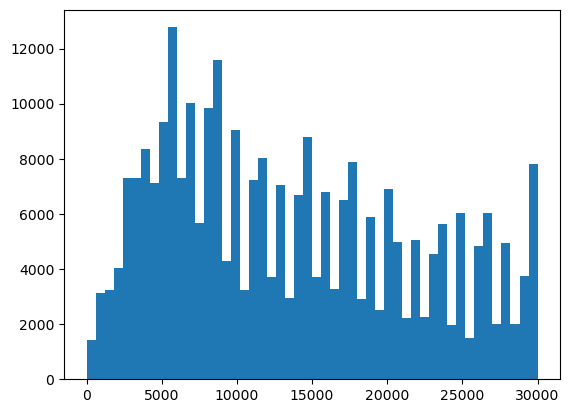

In [63]:
plt.hist(df.price[df.price <= 30000], bins=50, range=[0,30000])

**Most dollar prices below 500 are fake. Used cars worth more than 150,000 are outliers. Both have been dropped.**

(array([5.00000e+00, 4.30000e+01, 3.61000e+02, 4.35000e+02, 1.21300e+03,
        3.08500e+03, 3.16100e+03, 7.11200e+03, 6.85130e+04, 2.60613e+05]),
 array([1900. , 1911.9, 1923.8, 1935.7, 1947.6, 1959.5, 1971.4, 1983.3,
        1995.2, 2007.1, 2019. ]),
 <BarContainer object of 10 artists>)

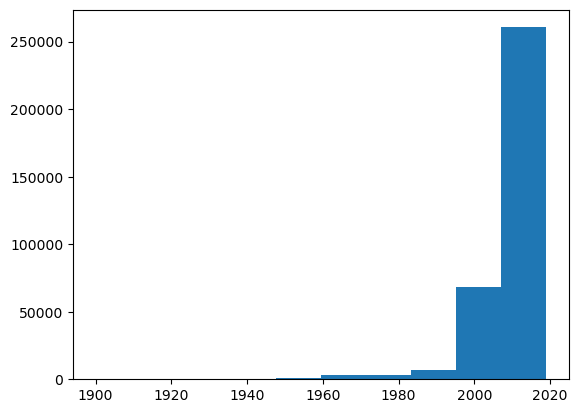

In [16]:
plt.hist(df.year[df['year'] < 2020])#.describe()

**Most of the data are for cars released between 2000 and 2020. Barely any are below 1995. However, I was lenient and set the threshold as any car made after 1970.**

(array([  781.,   553.,  1845.,  1902.,  1582.,  1913.,  3130.,  7291.,
        29740., 74225.]),
 array([1950. , 1956.1, 1962.2, 1968.3, 1974.4, 1980.5, 1986.6, 1992.7,
        1998.8, 2004.9, 2011. ]),
 <BarContainer object of 10 artists>)

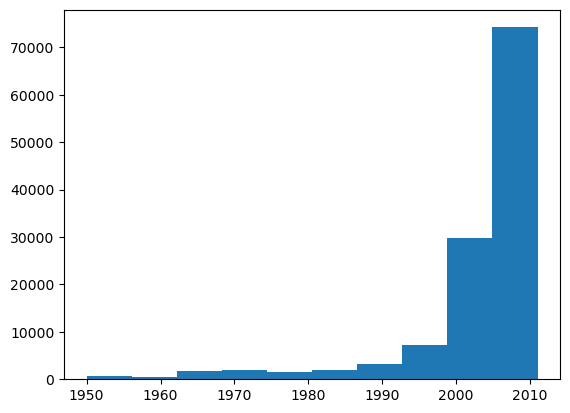

In [17]:
plt.hist(df.year[df['year'] < 2011], range=[1950, 2011])#.describe()

**Years before 1970 are more 'antique' cars, are outliers, and should be dropped.**

In [18]:
df.drop(df[df.year <= 1970].index, inplace = True)

**14,340 rows missing manufacturers, 
4,157 rows missing model,
759 rows missing year**

**These can be found using the VIN number if it is not null (137,980 are null). The dataframe can be split into those with VIN and those without and the VIN can be used to input manufacturer, model, year, and other information.**


**Rows without odometer information should be dropped.**

In [19]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               759
manufacturer     13359
model             3620
condition       138091
cylinders       150584
fuel              1711
odometer          1832
title_status         0
transmission      1493
VIN             133755
drive           107661
size            258831
type             76011
paint_color     100010
image_url            0
description          2
county          358460
state                0
lat               3352
long              3352
posting_date         0
dtype: int64

In [20]:
df = df[df.odometer.notna()]

**Making Sure the # of rows without VIN adds up with VIN null values to get total dataframe**

In [21]:
df[df.VIN.notna()].shape[0] == df.shape[0] - df[df.VIN.isnull()].shape[0]

True

**Duplicate VIN = Same Car. Need to drop duplicates so data is not given double weight**

In [22]:
df2 = df.drop_duplicates(subset='VIN')

In [23]:
df2.VIN.is_unique

True

**All Rows are verified as unique car. Now, dataframe will be split for further processing, verifying the car data by using the VIN through NHTSA api.**

In [24]:
vin_df = df2[df2.VIN.notna()]
no_vin_df = df2[df2.VIN.isnull()]

In [25]:
vin_df.shape

(96571, 26)

**The process using the API to generate information from VIN is computationally expensive and time sensitive. The process is in separate notebook.**

**Summary: 'vin_df', above, creates 'gdf.csv', below.**

In [26]:
vinny = pd.read_csv('data/gdf.csv')
vinny = vinny.drop(['Unnamed: 0'], axis = 1)
vinny.head(25)

C:\Users\mitch\AppData\Local\Temp\ipykernel_15700\1595645458.py:1: DtypeWarning: Columns (14,30,42,80,102,104,106,115) have mixed types. Specify dtype option on import or set low_memory=False.
  vinny = pd.read_csv('data/gdf.csv')


,ABS,ActiveSafetySysNote,AdaptiveCruiseControl,AdaptiveDrivingBeam,AdaptiveHeadlights,AdditionalErrorText,AirBagLocCurtain,AirBagLocFront,AirBagLocKnee,AirBagLocSeatCushion,...,ValveTrainDesign,VehicleDescriptor,VehicleType,WheelBaseLong,WheelBaseShort,WheelBaseType,WheelSizeFront,WheelSizeRear,Wheels,Windows
0,NaN,NaN,NaN,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),NaN,NaN,...,NaN,3GTP1VEC*EG,TRUCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver and Passenger),NaN,NaN,...,Overhead Valve (OHV),1GCSCSE0*AZ,TRUCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Standard,NaN,Optional,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),NaN,NaN,...,NaN,3GCPWCED*LG,TRUCK,NaN,NaN,NaN,17.0,17.0,4.0,NaN
3,Standard,NaN,NaN,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),1st Row (Driver and Passenger),NaN,...,Dual Overhead Cam (DOHC),5TFRM5F1*HX,TRUCK,NaN,145.7,Long,18.0,18.0,4.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver and Passenger),NaN,NaN,...,NaN,1GT220CG*CZ,TRUCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),NaN,NaN,...,Overhead Valve (OHV),1GCVKREH*GZ,TRUCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),NaN,NaN,...,Dual Overhead Cam (DOHC),1GCHTCE3*G1,TRUCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver and Passenger),NaN,1st Row (Driver and Passenger),...,NaN,1G1YR3DW*B5,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Standard,ParkSense Rear Park Assist: Optional,NaN,NaN,NaN,NaN,NaN,1st Row (Driver and Passenger),NaN,NaN,...,NaN,1C4BJWDG*HL,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,116.0,NaN,16.0,16.0,4.0,NaN
9,Standard,Automatic Crash Notification: Optional for Wor...,NaN,NaN,NaN,NaN,All Rows,1st Row (Driver and Passenger),NaN,NaN,...,Overhead Valve (OHV),1GCNCNEH*HZ,TRUCK,NaN,119.0,NaN,17.0,17.0,4.0,NaN


In [27]:
print(str(len(vinny)))
null_dic = vinny.isnull().sum().to_dict()
null_dic

101928


{'ABS': 76273,
 'ActiveSafetySysNote': 94477,
 'AdaptiveCruiseControl': 92805,
 'AdaptiveDrivingBeam': 93489,
 'AdaptiveHeadlights': 101928,
 'AdditionalErrorText': 101276,
 'AirBagLocCurtain': 52021,
 'AirBagLocFront': 11849,
 'AirBagLocKnee': 79691,
 'AirBagLocSeatCushion': 98939,
 'AirBagLocSide': 21678,
 'AutoReverseSystem': 80525,
 'AutomaticPedestrianAlertingSound': 100574,
 'AxleConfiguration': 101811,
 'Axles': 80041,
 'BasePrice': 85384,
 'BatteryA': 101917,
 'BatteryA_to': 101928,
 'BatteryCells': 101926,
 'BatteryInfo': 101591,
 'BatteryKWh': 101789,
 'BatteryKWh_to': 101859,
 'BatteryModules': 101928,
 'BatteryPacks': 101254,
 'BatteryType': 101444,
 'BatteryV': 101647,
 'BatteryV_to': 101928,
 'BedLengthIN': 101697,
 'BedType': 59479,
 'BlindSpotIntervention': 101910,
 'BlindSpotMon': 89487,
 'BodyCabType': 42522,
 'BodyClass': 744,
 'BrakeSystemDesc': 100475,
 'BrakeSystemType': 62277,
 'BusFloorConfigType': 2808,
 'BusLength': 101926,
 'BusType': 2808,
 'CAN_AACN': 89514

**Some VINS generated errors and created no additional data. These can be recycled into those with missing VIN data.**

In [28]:
vinny.ErrorCode.value_counts()

ErrorCode
0              100665
1                 228
6,7               194
1,400             138
1,7,400           108
6,7,11             66
1,7                59
6,7,11,400         46
1,3,14             43
1,5,14             28
5,6,14             25
0,14               25
1,4,14             22
6,7,400            21
4,14               20
1,7,11,400         19
1,3,14,400         19
3,14               18
1,14               18
5,14               15
7                  15
2,14               15
8                  14
1,5,14,400         12
1,8                12
6,11,14,400        11
1,4,14,400         10
6,8                 9
1,2,14              8
6,14                7
6,11,14             6
1,2,14,400          6
6                   5
0,10                4
4,6,14              3
6,8,11              3
1,8,400             3
1,11,400            3
5,6,14,400          1
0,9                 1
1,11,14,400         1
6,11                1
4,6,14,400          1
Name: count, dtype: int64

In [29]:
vindf = vinny[vinny.ErrorCode == '0']
vinny_errors = vinny[vinny.ErrorCode != '0']
vindf.shape

(100665, 150)

**Incomplete vehicles, buses, motorcycles, trailers, and low speed vehicles are small part of data and should be dropped**

In [30]:
vindf.VehicleType.value_counts()

VehicleType
PASSENGER CAR                           39751
MULTIPURPOSE PASSENGER VEHICLE (MPV)    37466
TRUCK                                   21101
INCOMPLETE VEHICLE                       2003
BUS                                       234
MOTORCYCLE                                 57
TRAILER                                    50
LOW SPEED VEHICLE (LSV)                     3
Name: count, dtype: int64

In [31]:
vindf = vindf[vindf.VehicleType.isin(['PASSENGER CAR', 'MULTIPURPOSE PASSENGER VEHICLE (MPV)', 'TRUCK'])]

In [32]:
vindf.isnull().sum().to_dict()

{'ABS': 72883,
 'ActiveSafetySysNote': 90900,
 'AdaptiveCruiseControl': 89378,
 'AdaptiveDrivingBeam': 90062,
 'AdaptiveHeadlights': 98318,
 'AdditionalErrorText': 98318,
 'AirBagLocCurtain': 48799,
 'AirBagLocFront': 9992,
 'AirBagLocKnee': 76233,
 'AirBagLocSeatCushion': 95430,
 'AirBagLocSide': 19060,
 'AutoReverseSystem': 77154,
 'AutomaticPedestrianAlertingSound': 97133,
 'AxleConfiguration': 98313,
 'Axles': 76761,
 'BasePrice': 81798,
 'BatteryA': 98307,
 'BatteryA_to': 98318,
 'BatteryCells': 98316,
 'BatteryInfo': 97981,
 'BatteryKWh': 98179,
 'BatteryKWh_to': 98249,
 'BatteryModules': 98318,
 'BatteryPacks': 97644,
 'BatteryType': 97930,
 'BatteryV': 98040,
 'BatteryV_to': 98318,
 'BedLengthIN': 98088,
 'BedType': 56577,
 'BlindSpotIntervention': 98300,
 'BlindSpotMon': 86082,
 'BodyCabType': 40960,
 'BodyClass': 1,
 'BrakeSystemDesc': 96944,
 'BrakeSystemType': 61057,
 'BusFloorConfigType': 0,
 'BusLength': 98318,
 'BusType': 0,
 'CAN_AACN': 86124,
 'CIB': 86900,
 'CashForCl

**Way too many useless rows! Some are 100% null. Dropping the columns that are over 98% null.**

In [33]:
dropCols = []
for k,v in vindf.isnull().sum().to_dict().items():
    if v > (0.98 * 98318):
        dropCols.append(k)
dropCols

['AdaptiveHeadlights',
 'AdditionalErrorText',
 'AutomaticPedestrianAlertingSound',
 'AxleConfiguration',
 'BatteryA',
 'BatteryA_to',
 'BatteryCells',
 'BatteryInfo',
 'BatteryKWh',
 'BatteryKWh_to',
 'BatteryModules',
 'BatteryPacks',
 'BatteryType',
 'BatteryV',
 'BatteryV_to',
 'BedLengthIN',
 'BlindSpotIntervention',
 'BrakeSystemDesc',
 'BusLength',
 'CashForClunkers',
 'ChargerLevel',
 'ChargerPowerKW',
 'CurbWeightLB',
 'DriverAssist',
 'EDR',
 'EVDriveUnit',
 'EngineKW',
 'EntertainmentSystem',
 'GCWR',
 'GCWR_to',
 'LaneCenteringAssistance',
 'NCSABodyType',
 'NCSAMake',
 'NCSAMapExcApprovedBy',
 'NCSAMapExcApprovedOn',
 'NCSAMappingException',
 'NCSAModel',
 'NCSANote',
 'NonLandUse',
 'OtherBusInfo',
 'OtherMotorcycleInfo',
 'OtherTrailerInfo',
 'PossibleValues',
 'RearAutomaticEmergencyBraking',
 'SAEAutomationLevel',
 'SAEAutomationLevel_to',
 'SuggestedVIN',
 'TrackWidth',
 'TrailerLength',
 'WheelBaseLong']

In [34]:
vindf.drop(columns=dropCols, axis = 1, inplace=True)

In [35]:
vindf.shape

(98318, 100)

**Wow. 50 rows gone. Nice!**

**Now, time to merge these columns with the craigslist data according to their VIN.**

In [36]:
print('New Data: ' + str(len(vindf)) + ' rows')
print('Original: ' + str(len(vin_df)) + ' rows')

New Data: 98318 rows
Original: 96571 rows


In [65]:
cols = vin_df.columns.to_list()
cols2 = vindf.columns.to_list()
list(set(cols) & set(cols2))

['VIN']

In [38]:
print('API data, VIN column datatype: ' + str(vindf['VIN'].dtype))
print('Craigslist data, VIN column datatype: ' + str(vin_df['VIN'].dtype))

API data, VIN column datatype: object
Craigslist data, VIN column datatype: object


In [66]:
vindf['VIN'].apply(str)
vin_df['VIN'].apply(str)

27        3GTP1VEC4EG551563
28        1GCSCSE06AZ123805
29        3GCPWCED5LG130317
30        5TFRM5F17HX120972
32        1GT220CG8CZ231238
                ...        
426682    56ZL1UJ20KP000149
426727    2A8GF68446R882658
426737    2HGES15535H620534
426746    1FDWF37P64EA24868
426833    SAJGX2749VCOO8376
Name: VIN, Length: 96571, dtype: object

In [67]:
print(vindf.VIN.is_unique)
vin_df.VIN.is_unique

True


True

In [49]:
api_vins = vindf.VIN.to_list()

craig_vins = vin_df.VIN.to_list()

In [77]:
print(str(len(set(craig_vins) ^ set(api_vins))) + ' rows have VINS that are not in both datasets. This is likely due to dropping the VINs that generated errors and other cleaning methods.')

8827 rows have VINS that are not in both datasets. This is likely due to dropping the VINs that generated errors and other cleaning methods.


In [76]:
print(str(len(list(set(craig_vins) & set(api_vins)))) + ' rows have VINS that are in both datasets')

93031 rows have VINS that are in both datasets


In [56]:
merged_df = vindf.merge(vin_df, on='VIN')

Index(['ABS', 'ActiveSafetySysNote', 'AdaptiveCruiseControl',
       'AdaptiveDrivingBeam', 'AirBagLocCurtain', 'AirBagLocFront',
       'AirBagLocKnee', 'AirBagLocSeatCushion', 'AirBagLocSide',
       'AutoReverseSystem',
       ...
       'size', 'type', 'paint_color', 'image_url', 'description', 'county',
       'state', 'lat', 'long', 'posting_date'],
      dtype='object', length=125)

In [57]:
merged_df.columns.to_list()

['ABS',
 'ActiveSafetySysNote',
 'AdaptiveCruiseControl',
 'AdaptiveDrivingBeam',
 'AirBagLocCurtain',
 'AirBagLocFront',
 'AirBagLocKnee',
 'AirBagLocSeatCushion',
 'AirBagLocSide',
 'AutoReverseSystem',
 'Axles',
 'BasePrice',
 'BedType',
 'BlindSpotMon',
 'BodyCabType',
 'BodyClass',
 'BrakeSystemType',
 'BusFloorConfigType',
 'BusType',
 'CAN_AACN',
 'CIB',
 'CoolingType',
 'CustomMotorcycleType',
 'DaytimeRunningLight',
 'DestinationMarket',
 'DisplacementCC',
 'DisplacementCI',
 'DisplacementL',
 'Doors',
 'DriveType',
 'DynamicBrakeSupport',
 'ESC',
 'ElectrificationLevel',
 'EngineConfiguration',
 'EngineCycles',
 'EngineCylinders',
 'EngineHP',
 'EngineHP_to',
 'EngineManufacturer',
 'EngineModel',
 'ErrorCode',
 'ErrorText',
 'ForwardCollisionWarning',
 'FuelInjectionType',
 'FuelTypePrimary',
 'FuelTypeSecondary',
 'GVWR',
 'GVWR_to',
 'KeylessIgnition',
 'LaneDepartureWarning',
 'LaneKeepSystem',
 'LowerBeamHeadlampLightSource',
 'Make',
 'MakeID',
 'Manufacturer',
 'Manufa

**Only one VIN column is what we are looking for. This tells me the merge worked correctly.**

In [58]:
merged_df.shape

(93031, 125)

**The number of rows and columns match the overlap between VINs and the new columns**

In [59]:
merged_df.VIN.is_unique

True

**VINs must be unique. Nothing got duplicated in the process**

In [78]:
merged_df.isnull().sum().to_dict()

{'ABS': 69089,
 'ActiveSafetySysNote': 86030,
 'AdaptiveCruiseControl': 84637,
 'AdaptiveDrivingBeam': 85248,
 'AirBagLocCurtain': 46318,
 'AirBagLocFront': 9557,
 'AirBagLocKnee': 72201,
 'AirBagLocSeatCushion': 90286,
 'AirBagLocSide': 18207,
 'AutoReverseSystem': 73099,
 'Axles': 72748,
 'BasePrice': 77475,
 'BedType': 53661,
 'BlindSpotMon': 81543,
 'BodyCabType': 38776,
 'BodyClass': 1,
 'BrakeSystemType': 57722,
 'BusFloorConfigType': 0,
 'BusType': 0,
 'CAN_AACN': 81598,
 'CIB': 82283,
 'CoolingType': 83819,
 'CustomMotorcycleType': 0,
 'DaytimeRunningLight': 74088,
 'DestinationMarket': 90149,
 'DisplacementCC': 828,
 'DisplacementCI': 828,
 'DisplacementL': 828,
 'Doors': 15505,
 'DriveType': 26070,
 'DynamicBrakeSupport': 72856,
 'ESC': 71413,
 'ElectrificationLevel': 90333,
 'EngineConfiguration': 34450,
 'EngineCycles': 87509,
 'EngineCylinders': 8493,
 'EngineHP': 42709,
 'EngineHP_to': 86998,
 'EngineManufacturer': 48432,
 'EngineModel': 43042,
 'ErrorCode': 0,
 'ErrorTex

**There are still more columns to be dropped. For now, I will explore the missing 'craigslist' data with what was found with the VIN api exploration**

In [94]:
manIdx = merged_df.Manufacturer[merged_df.manufacturer.isnull()].index.to_list()
len(manIdx)

1768

**These are all the indices where the craigslist data did not have a manufacturer but the API was able to determine it.**

In [88]:
merged_df[cols].iloc[manIdx]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
59,7309271279,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,NaN,hatchback,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-04-19 15:51:13+00:00
89,7305150004,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,14990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,NaN,hatchback,red,https://images.craigslist.org/00B0B_5RIqCKqtsP...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-04-11 15:11:14+00:00
107,7302642422,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,8990,2013.0,NaN,smart fortwo Passion Hatchback,good,NaN,...,NaN,coupe,silver,https://images.craigslist.org/00c0c_krE0mSA168...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-04-06 16:21:37+00:00
122,7316725360,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,33990,NaN,NaN,lac XT5 Crossover,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00y0y_hPSlZLpavL...,2018 *Cadillac* *XT5 Crossover* FWD 4dr Premiu...,NaN,al,33.669601,-86.817617,2021-05-04 15:11:04+00:00
139,7316206718,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,https://bham.craigslist.org,45900,2017.0,NaN,Maserati Levante,NaN,6 cylinders,...,NaN,SUV,white,https://images.craigslist.org/00G0G_f8kyvPqqhi...,"2017 *Maserati* *Levante* 3.0L SUV - $45,900Ca...",NaN,al,33.669601,-86.817617,2021-05-03 15:12:44+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92574,7311402134,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,11995,2017.0,NaN,VOLKSWAGON JETTA S,excellent,4 cylinders,...,compact,sedan,red,https://images.craigslist.org/00H0H_j5qab2nVTq...,CLASSIC MOTOR CARS INC ...,NaN,wi,42.995900,-87.994400,2021-04-23 16:30:14+00:00
92639,7310373496,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,11995,2014.0,NaN,VOLKSWAGON TIGUAN,excellent,4 cylinders,...,full-size,SUV,white,https://images.craigslist.org/00n0n_7UgehmUmxn...,CLASSIC MOTOR CARS INC ...,NaN,wi,42.995900,-87.994400,2021-04-21 16:15:48+00:00
92671,7309156460,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,36590,2018.0,NaN,Genesis G80 3.3T Sport Sedan 4D,good,6 cylinders,...,NaN,sedan,red,https://images.craigslist.org/00H0H_eusesxmcIG...,Carvana is the safer way to buy a car During t...,NaN,wi,43.060000,-87.960000,2021-04-19 12:32:29+00:00
92716,7307911359,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,12995,2013.0,NaN,gmce sierra,excellent,8 cylinders,...,NaN,NaN,grey,https://images.craigslist.org/00o0o_66CC5WmfJo...,American Auto 2802 w. Burnham St. Milwaukee's ...,NaN,wi,43.010773,-87.949522,2021-04-16 20:13:27+00:00


In [100]:
merged_df.Model.iloc[59]

'Scion iM'

In [95]:
modelIdx = merged_df.Model[merged_df.model.isnull()].index.to_list()
len(modelIdx)

452

In [97]:
yearIdx = merged_df.ModelYear[merged_df.year.isnull()].index.to_list()
len(yearIdx)

348

**Welp, all that for ~3000 missing values. But removing VIN duplicates and verifying the correct information was inputted was worth it. There was also additional info gained from running the VINs through the API, though much of it is missing.**

In [ ]:
merged_df.to_csv('merged_vins.csv', index=False)